In [63]:
from sklearn.datasets import load_wine
import pandas as pd
# Read the wine dataset 
dataset = load_wine() 
df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names']) 
df = df.assign(target=pd.Series(dataset['target']).values)

In [64]:
# Filter the irrelevant columns 
df = df[['alcohol', 'magnesium', 'target']] 
# Filter the irrelevant label 
df = df[df.target != 0]

In [65]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and validation datasets.
train_df, val_df = train_test_split(df, test_size=30, random_state=3)

## q1

In [66]:
import matplotlib.pyplot as plt

def display_scatter(df, title):
    """ Display scatter plot of wineries' alcohol and magnesium distribution in the dataset. """
    winery_1 = df[df['target'] == 1]
    plt.scatter(winery_1['alcohol'], winery_1['magnesium'], c='mediumslateblue', label='Winery 1')
    winery_2 = df[df['target'] == 2]
    plt.scatter(winery_2['alcohol'], winery_2['magnesium'], c='limegreen', label='Winery 2')

    plt.xlabel('Alcohol')
    plt.ylabel('Magnesium', rotation='horizontal', labelpad=30)
    plt.title('Wineries alcohol and magnesium distribution\nfor ' + title)
    plt.legend()
    plt.show()


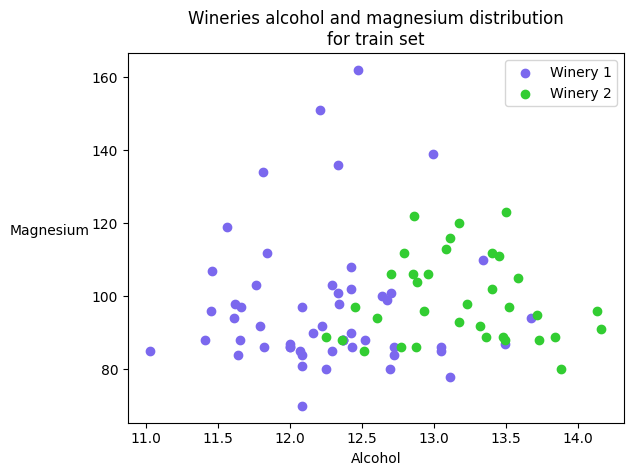

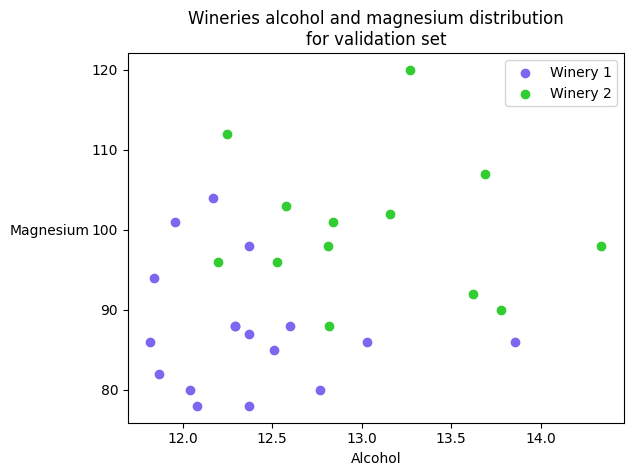

In [67]:
# Display scatter plots for the training and validation datasets.
display_scatter(train_df, 'train set')
display_scatter(val_df, 'validation set')

From the above train plot we can infer that the train data is not linearly seperable, hence the Hard SVM algorithm will fail and has no solution.

## Q2

In [68]:
import numpy as np
""" This code cell is taken from the tutorial's notebook: """

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=70, linewidth=1.5, facecolors='none',cmap='coolwarm', edgecolor='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


In [69]:
from sklearn.svm import SVC

def plot_svm(model, X, y, title, ax=None, plot_support=False):
    """ Plot the decision function for a 2D SVC. """
    ax = ax or plt.gca()
    # Separate the wineries' data.
    X_winery_1 = X[y == 1]
    X_winery_2 = X[y == 2]
    # Plot the wineries' data.
    ax.scatter(X_winery_1[:, 0], X_winery_1[:, 1], c='blue', s=40, label='Winery 1')
    ax.scatter(X_winery_2[:, 0], X_winery_2[:, 1], c='red', s=40,label='Winery 2')

    plot_svc_decision_function(model, ax, plot_support)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Alcohol', fontsize=14)
    ax.set_ylabel('Magnesium', fontsize=14)
    ax.legend(fontsize=14)


def plot_svm_train_and_test(train, test, c, kernel='linear', deg=None):
    """ Train and plot the SVM model for the train and test datasets. """
    # Create 2 sub-plots, one for the train and one for the test datasets.
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

    def separate_features_labels(df):
        """ Separate the features and labels from the dataset. """
        X = df[['alcohol', 'magnesium']]
        y = df['target']
        return X.values, y.values
    
    X_train, y_train = separate_features_labels(train)
    # Train the SVM model.
    if deg is None:
        model = SVC(kernel=kernel, C=c)
        title = 'Linear Soft-SVM of '
    else:
        model = SVC(kernel=kernel, degree=deg, C=c)
        title = 'Polynomial Soft-SVM of '
    model.fit(X_train, y_train)

    # Plot the train dataset.
    plot_svm(model, X_train, y_train, title + 'train set with C=' + str(c), ax=axes[0], plot_support=True)

    X_test, y_test = separate_features_labels(test)
    # Plot the test dataset.
    plot_svm(model, X_test, y_test, title + 'validation set with C=' + str(c), ax=axes[1], plot_support=False)

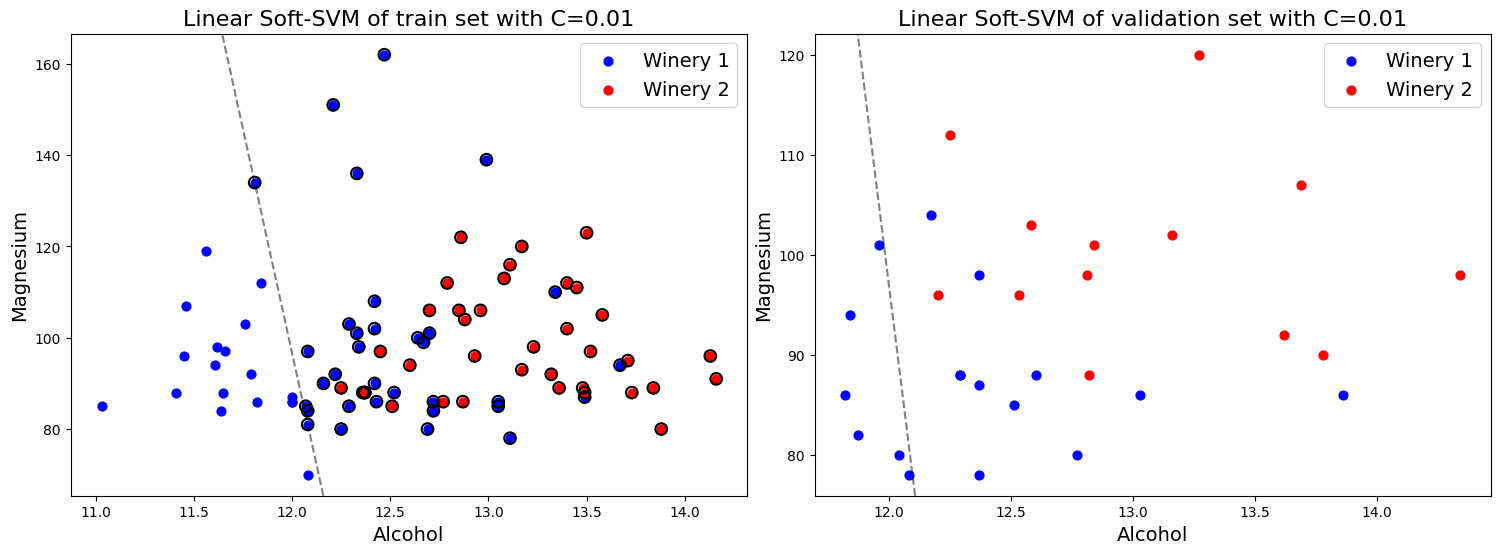

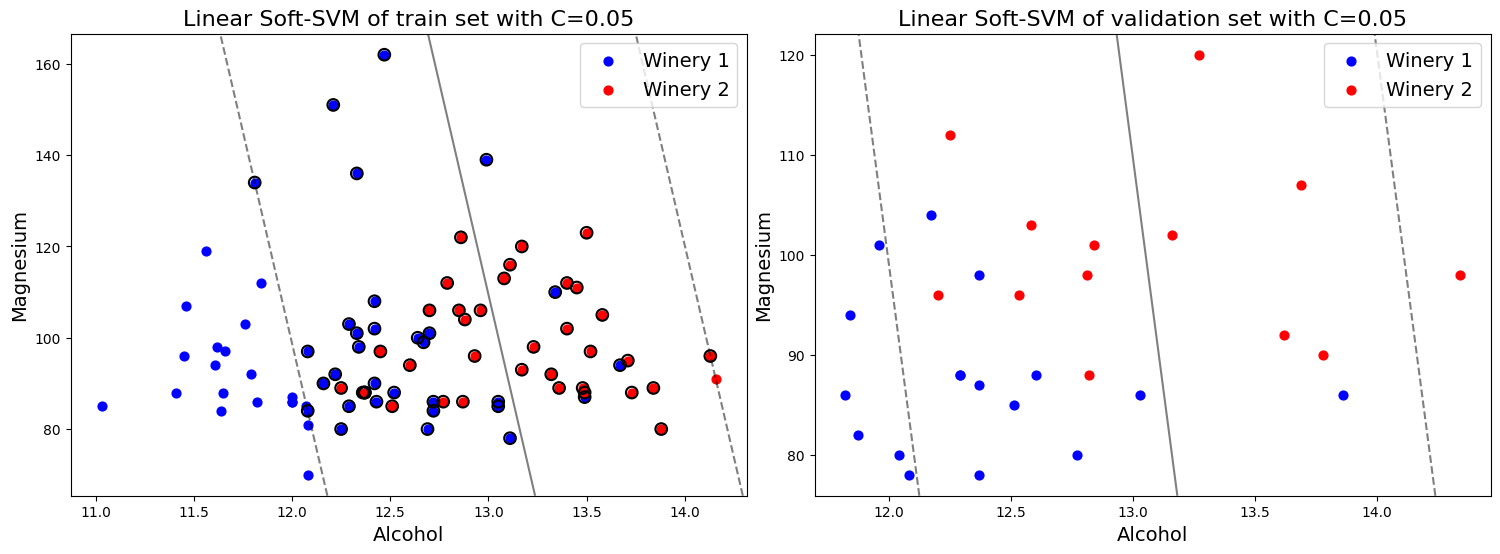

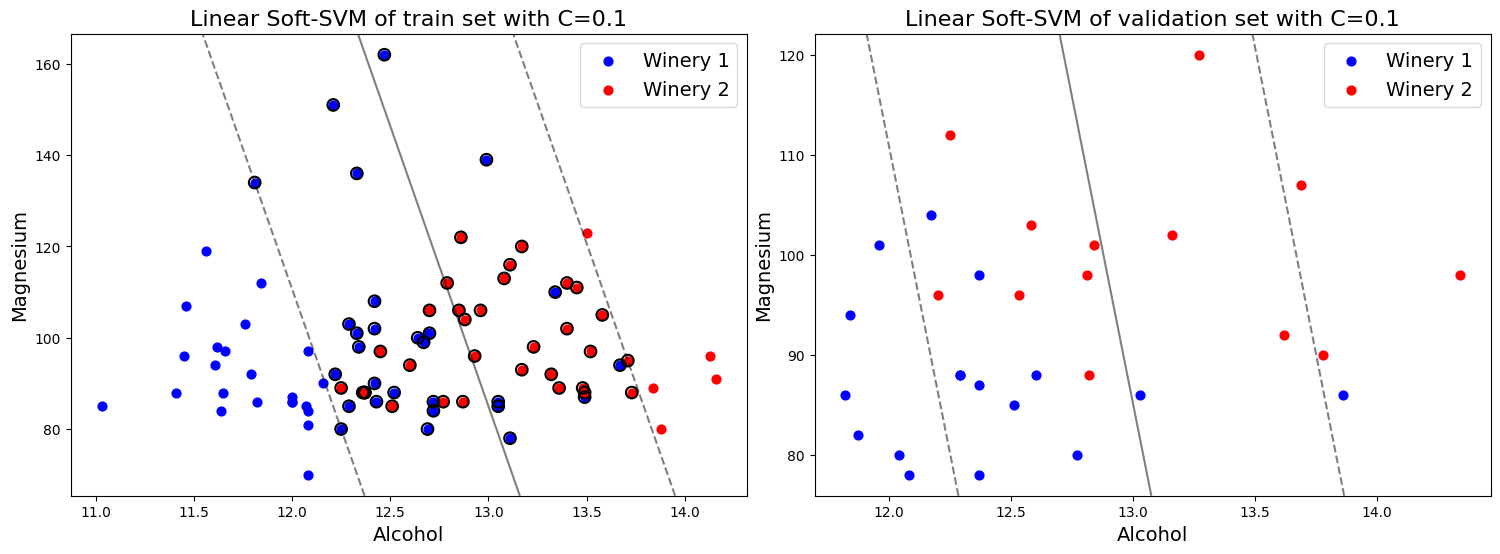

In [70]:
c_list = [0.01, 0.05, 0.1]
# For each C value, train and plot the SVM model for the train and test datasets.
for c in c_list:
    plot_svm_train_and_test(train_df, val_df, c)


## Q3
![צילום מסך 2024-02-19 200036.png](<attachment:צילום מסך 2024-02-19 200036.png>)
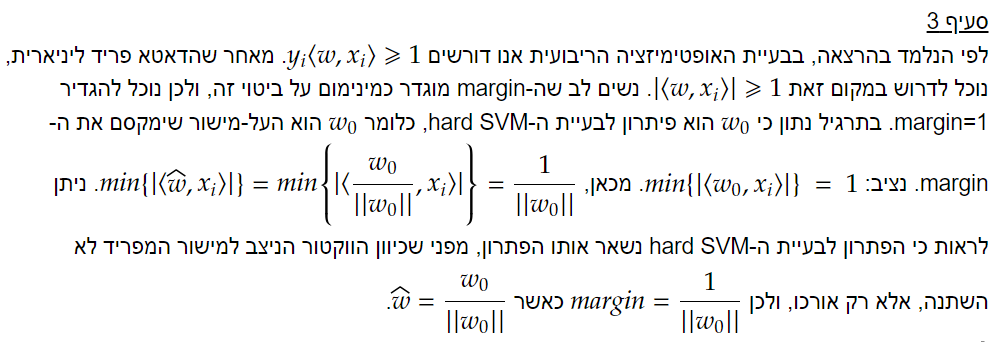

## Q4

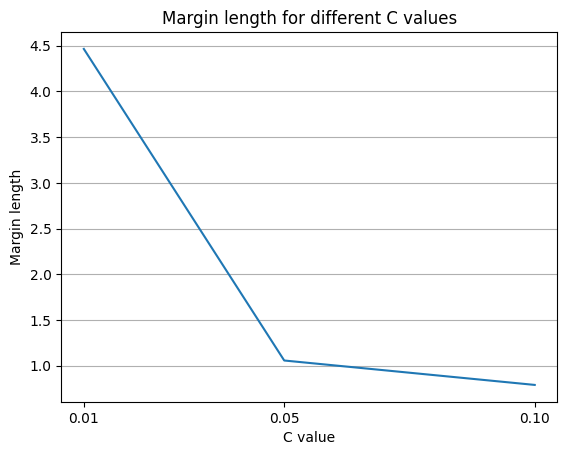

In [71]:
margins = list()
# For each C value, train the SVM model and calculate the margin length.
for c in c_list:
    model = SVC(kernel='linear', C=c)
    model.fit(train_df[['alcohol', 'magnesium']].values, train_df['target'].values)
    marg_len=1/np.linalg.norm(model.coef_[0])
    margins.append(marg_len)

# Plot the margin length for each C value.
plt.plot(c_list, margins)
plt.xticks(c_list)
plt.xlabel('C value')
plt.ylabel('Margin length')
plt.title('Margin length for different C values')
plt.grid(axis='y')
plt.show()

The graph above is monotonically decreasing, and we notice that it has a significant decrease between 0.01 and 0.05.

This supports the claim we saw in class: the larger C is, the smaller the train error is, and the narrower the margin is - and vice versa. This is because the C value multiplies the loss function of the train, and the larger C gets, the larger this multiplication is, and the train loss becomes more significant in the Soft-SVM function. On the other hand, the smaller C is, the multiplication be less significant than the norm squared of w, i.e the margin will be more significant in the Soft-SVM function.

## Q5

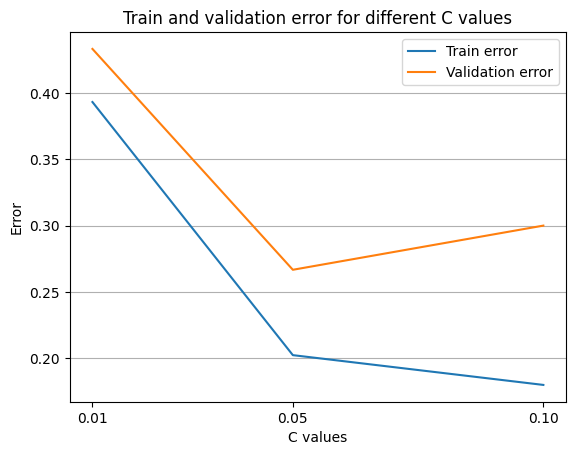

In [72]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
train_errors = list()
validation_errors = list()

# For each C value, train the SVM model and calculate the train and validation errors.
for c in c_list:
    model = SVC(kernel='linear', C=c)
    model.fit(train_df[['alcohol', 'magnesium']], train_df['target'])
    # Calculate the train and validation errors using the score method.
    train_errors.append(1-model.score(train_df[['alcohol', 'magnesium']], train_df['target']))
    validation_errors.append(1-model.score(val_df[['alcohol', 'magnesium']], val_df['target'])
)

# Plot the train and validation errors for each C value.
plt.plot(c_list, train_errors, label='Train error')
plt.plot(c_list, validation_errors, label='Validation error')
plt.xticks(c_list)
plt.xlabel('C values')
plt.ylabel('Error')
plt.title('Train and validation error for different C values')
plt.legend()
plt.grid(axis='y')
plt.show()        
    

From the graph above, we can observe that the graphs are monotonically decreasing until c is 0.05. Between 0.05 and 0.1, we can observe that the error values for the validation set rise as c increases. We can explain this phenomenon with the fact that c regulizes the loss function. As c increases the margin length decreases (as we saw in the graph in Q4) at some point this creates overfitting on the train set, which results in underfitting on the validation set as studied in class.

## Q6

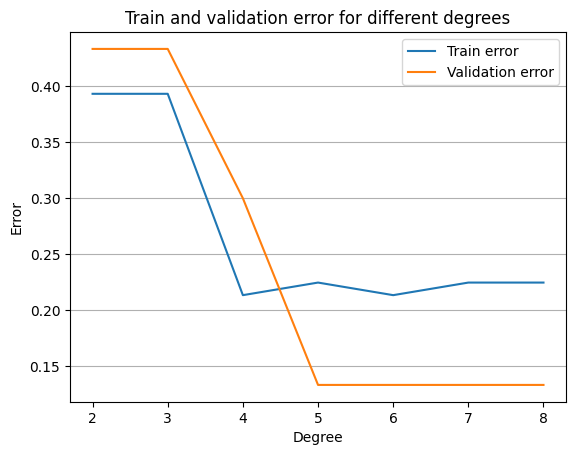

In [73]:
""" Train and plot the SVM model for the train and test datasets. """
train_errors = list()
validation_errors = list()
degrees_list = np.arange(2, 9)

# For each degree value, train the SVM model and calculate the train and validation errors.
for d in degrees_list:
    model = SVC(kernel='poly', degree=d, C=1)
    model.fit(train_df[['alcohol', 'magnesium']], train_df['target'])
    train_errors.append(1-model.score(train_df[['alcohol', 'magnesium']], train_df['target']))
    validation_errors.append(1-model.score(val_df[['alcohol', 'magnesium']], val_df['target']))

# Plot the train and validation errors for each degree value.
plt.plot(degrees_list, train_errors, label='Train error')
plt.plot(degrees_list, validation_errors, label='Validation error')
plt.xticks(degrees_list)
plt.xlabel('Degree')
plt.ylabel('Error')
plt.title('Train and validation error for different degrees')
plt.legend()
plt.grid(axis='y')
plt.show()  

From the graph we observe that as the degree increases the error value of the validation set decrease, and in the higher degrees gets very close to 0.
We can explain this with the fact that we are mapping the data to a higher dimention, which makes the data more separable, because it is more flexible and capable of capturing complex patterns in the data.

## Q7
We choose degrees 2 and 6, because they receive the highest and lowest (respectivly) error values for both the train and validation set.

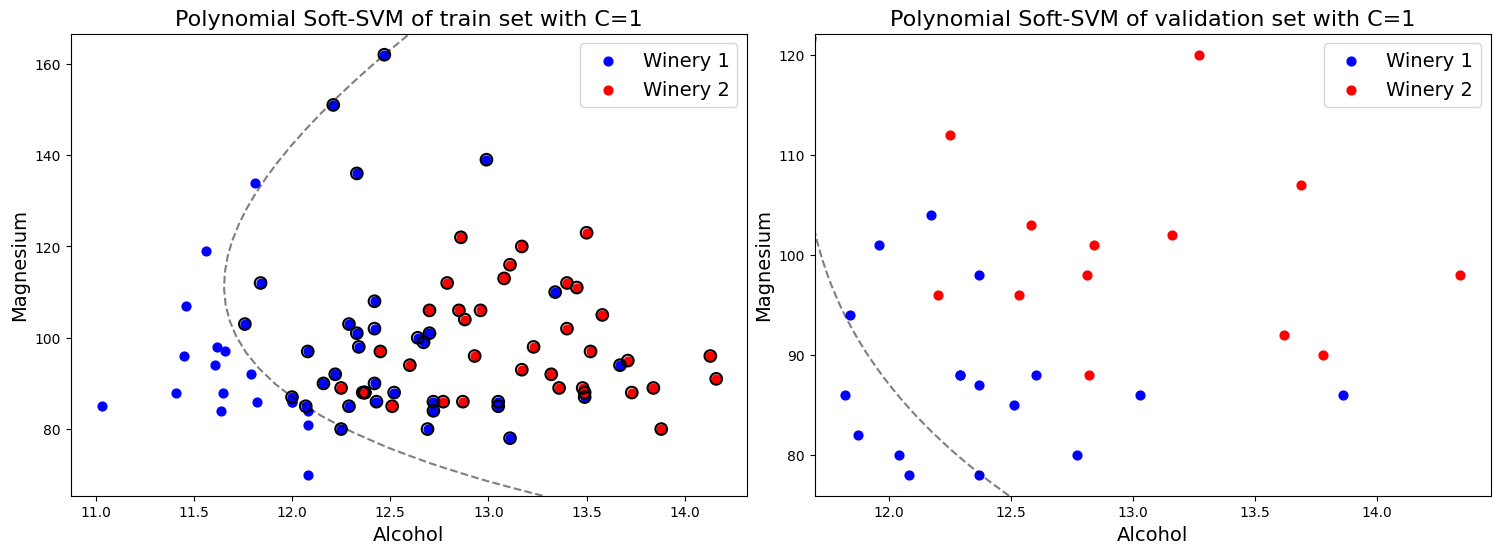

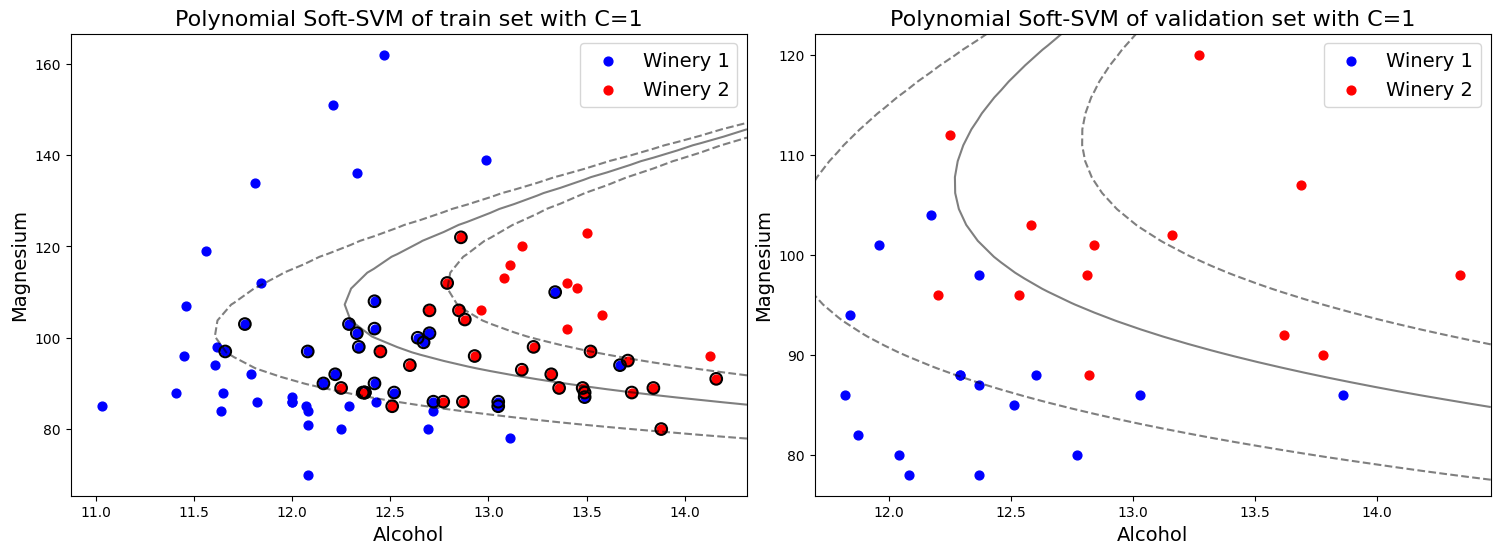

In [74]:
# For each degree value, train and plot the SVM model for the train and test datasets.
for d in [2, 6]:
    plot_svm_train_and_test(train_df, val_df, c=1, kernel='poly', deg=d)